Text(0, 0.5, 'Salida/Escalones %')

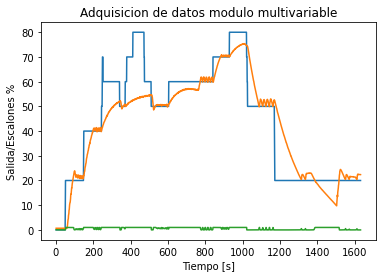

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import csv
#datos sin normalizar

data = np.genfromtxt(r'D:\CONTROL INTELIGENTE-2\base_multi.csv', delimiter=',')
t=np.arange(1,1632,1)

plt.plot(t,data[:,0],t,data[:,1],t,data[:,2])
plt.title('Adquisicion de datos modulo multivariable')
plt.xlabel('Tiempo [s]')
plt.ylabel('Salida/Escalones %')

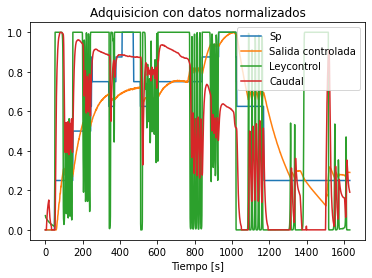

In [22]:
spmax=max(data[:,0])
spmin=min(data[:,0])
ymax=max(data[:,1])
ymin=min(data[:,1])
qmax=max(data[:,3])
qmin=min(data[:,3])

#normalizacion de datos para que esten en rango de 0-1
normsp=[]
normy=[]
normq=[]
z=len(data[:,0])
for i in range(z):
    nsp=(data[:,0][i]-spmin)/(spmax-spmin)
    normsp.append(nsp)
    
    ny=(data[:,1][i]-ymin)/(ymax-ymin)
    normy.append(ny)
    
    nq=(data[:,3][i]-qmin)/(qmax-qmin)
    normq.append(nq)
#graficacion de datos normalizados
plt.plot(t,normsp,t,normy,t,data[:,2],t,normq)
plt.title('Adquisicion con datos normalizados')
#plt.legend('SYUQ,')
plt.legend(["Sp", "Salida controlada","Leycontrol","Caudal"], loc ="best")
plt.xlabel('Tiempo [s]')
datos=np.array([normsp,normy,data[:,2],normq])

In [79]:
#datos=np.array([normsp,normy,data[:,2],normq]).transpose()
#datos=np.array([normsp,normy,normq]).transpose()
datos=np.array([normsp,normy,data[:,2]]).transpose()

In [84]:
kmeans = KMeans(n_clusters=10,n_init=1,init='random').fit(datos)
Y=kmeans.labels_
print(Y)

[1 1 1 ... 1 1 1]


In [85]:
labels = kmeans.predict(datos)
colores=['blue','green','red','cyan','magenta','yellow','black','white','orange','brown']
asignar=[]
for row in labels:
    asignar.append(colores[row])

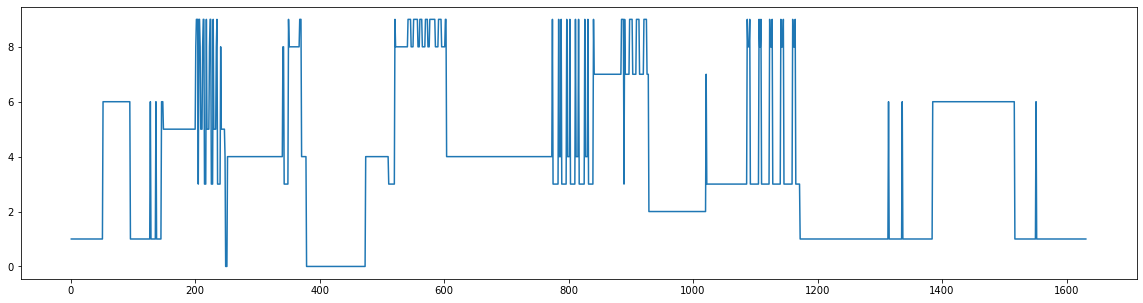

In [86]:
plt.figure(figsize=(20,5))
labels2=np.array(labels)
plt.plot(t,labels2)

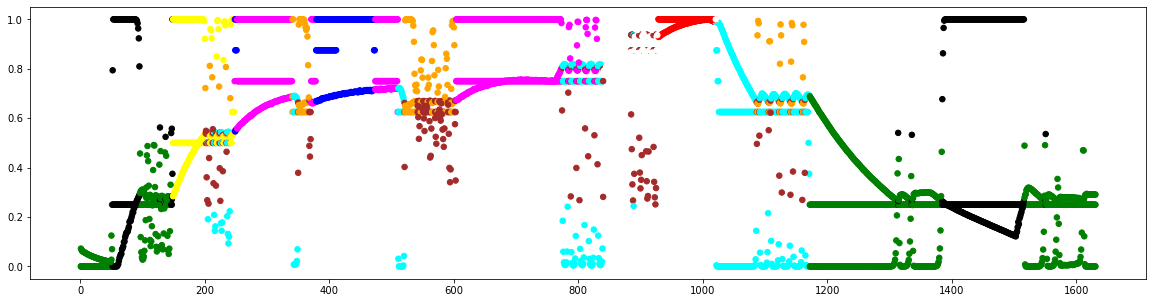

In [87]:
# kmeans.labels_
plt.figure(figsize=(20,5))
plt.scatter(t,datos[:,0],c=asignar,s=30)
plt.scatter(t,datos[:,1],c=asignar,s=30)
plt.scatter(t,datos[:,2],c=asignar,s=30)
#plt.scatter(t,datos[:,3],c=asignar,s=30)

#plt.scatter(centroids[:,0],centroids[:,1],centroids[:,2],centroids[:,3],centroids[:,4],centroids[:,5],c='red',marker='*',s=50)